# <center> **Customer Personality Analysis**

## Business Question

- Apa karakteristik statistik pelanggan?
- Apa kebiasaan belanja pelanggan?
- Apakah ada beberapa produk yang membutuhkan lebih banyak pemasaran?
- Bagaimana pemasaran dapat dibuat efektif?

## Import Library

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os


import plotly.express as px

%matplotlib inline

## Read Dataset

In [3]:
url = 'https://raw.githubusercontent.com/arienugroho050396/Customer-Personality-Analysis/main/marketing_campaign.csv'
customer = pd.read_csv(url, sep='\t')
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Preparation

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
customer.describe() 

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
#checking duplicated data
customer.duplicated().sum()

0

In [7]:
#checking missing value
customer.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
missing_values = customer.isna().sum().to_dict()
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

fig = px.bar(missing_values_df,
       x = 'Column',
       y = 'Missing_Values',
       template = 'plotly_white',
       title = 'Missing Values')
fig.show()

In [9]:
#remove missing value
customer = customer.dropna()

## Feature Engineering

### Age Customer

hitung usia setiap pelanggan dari tahun lahir pelanggan. Sejak pendaftaran pelanggan dengan perusahaan antara 2012 dan 2014, jadi kami berasumsi bahwa data dikumpulkan pada Januari 2015 demi kesederhanaan.

In [10]:
import datetime as dt
customer['Age'] = 2015 - customer.Year_Birth

### Months Since Enrollment

Dari tanggal pendaftaran pelanggan, mari kita hitung berapa bulan pelanggan berafiliasi dengan perusahaan.

In [11]:
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'],format="%d-%m-%Y")
customer['Month_Customer'] = 12.0 * (2015 - customer.Dt_Customer.dt.year ) + (1 - customer.Dt_Customer.dt.month)

### Total Spendings

Pengeluaran pelanggan diberikan secara terpisah untuk produk yang berbeda. Mari kita jumlahkan untuk menghitung total pengeluaran pelanggan.

In [12]:
customer['TotalSpendings'] =  customer.MntWines + customer.MntFruits + customer.MntMeatProducts + customer.MntFishProducts + customer.MntSweetProducts + customer.MntGoldProds

### Age Groups

Berdasarkan Usia bagi pelanggan ke dalam kelompok usia yang berbeda.

In [13]:
customer.loc[(customer['Age'] >= 13) & (customer['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer.loc[(customer['Age'] >= 20) & (customer['Age']<= 39), 'AgeGroup'] = 'Adult'
customer.loc[(customer['Age'] >= 40) & (customer['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
customer.loc[(customer['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

### Number of Children

Informasi diberikan secara terpisah untuk anak-anak dan remaja di rumah untuk setiap pelanggan. Maka jumlahkan mereka, karena mereka dapat lebih baik direpresentasikan bersama sebagai jumlah anak di rumah.

In [14]:
customer['Children'] = customer['Kidhome'] + customer['Teenhome']

### Marital Status

Kolom Status Perkawinan memiliki nilai string yang berbeda: Bersama, Menikah, Bercerai, Janda, Sendiri, Absurd, YOLO. Kebanyakan dari mereka termasuk dalam kategori yang sama. Jadi mari kita mewakili status perkawinan pelanggan berdasarkan 2 kategori utama yaitu Partner dan Single.

In [15]:
customer.Marital_Status = customer.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

### Removing Outliers

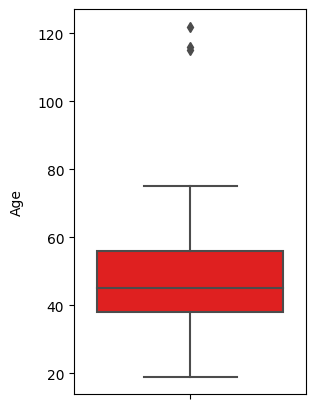

In [16]:
#showing outliers "age"
plt.figure(figsize=(3,5))
sns.boxplot(y=customer.Age, color ='red');
plt.ylabel('Age', fontsize=10, labelpad=10);

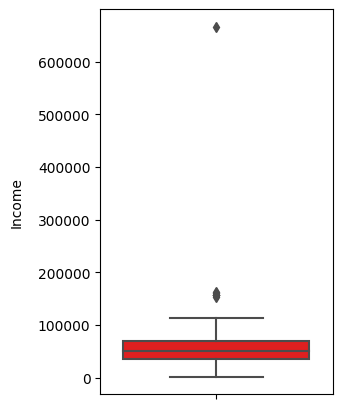

In [17]:
#showing outliers "Income"
plt.figure(figsize=(3,5))
sns.boxplot(y=customer.Income, color ='red');
plt.ylabel('Income', fontsize=10, labelpad=10);

**INSIGHT**
- Ada beberapa pelanggan berusia di atas 100 tahun. Hal ini tidak mungkin terjadi jadi ini dapat dikatakan outlier.
- Ada beberapa pelanggan yang berpenghasilan lebih dari 120.000 dan beberapa dari mereka bahkan lebih dari 600.000. Mereka jelas merupakan outlier dalam data.

In [18]:
#removing outliers
customer = customer[customer.Age < 100]
customer = customer[customer.Income < 120000]

## Exploratory Data Analysis

### Marital Status

In [19]:
maritalstatus = customer.Marital_Status.value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 4)))
fig.show()  

**INSIGHT**

2/3 pelanggan tinggal dengan pasangan sementara sekitar 1/3 masih lajang

### Average Spendings: Marital Status Wise

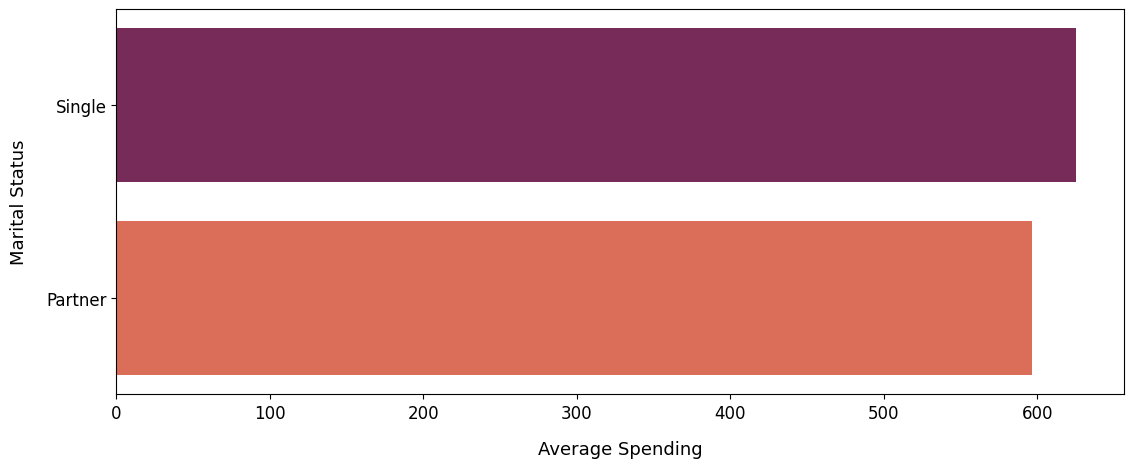

In [20]:
maritalspending = customer.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(13,5))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Average Spending', fontsize=13, labelpad=13)
plt.ylabel('Marital Status', fontsize=13, labelpad=13);

<Axes: xlabel='Marital_Status', ylabel='TotalSpendings'>

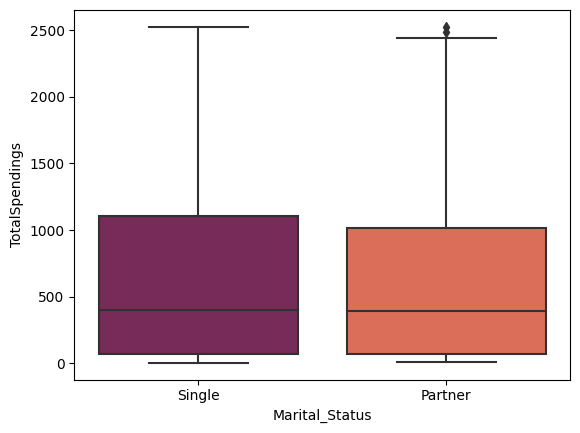

In [21]:
sns.boxplot(x="Marital_Status", y="TotalSpendings", data=customer, palette='rocket')

**INSIGHT**

Meskipun minoritas, para lajang rata-rata menghabiskan lebih banyak uang dibandingkan dengan pelanggan yang memiliki mitra.

### Education Level

In [27]:
education = customer.Education.value_counts()

fig = px.pie(education, 
             values = education.values, 
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

**INSIGHT**
- Setengah dari pelanggan adalah lulusan Universitas
- Ada lebih banyak pelanggan yang memiliki gelar PhD daripada pelanggan yang memiliki gelar Master

### Child Status

In [22]:
children = customer.Children.value_counts()

fig = px.pie(children, 
             values = children.values, 
             names = children.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

**INSIGHT**
- Sekitar 50% pelanggan hanya memiliki satu anak
- 28% pelanggan tidak memiliki anak di rumah sementara 19% di antaranya memiliki 2 anak

In [23]:
fig = px.sunburst(customer, path=['Marital_Status','Education', 'Children'], values='TotalSpendings', color='Education')
fig.show()

### Average Spendings: Child Status Wise

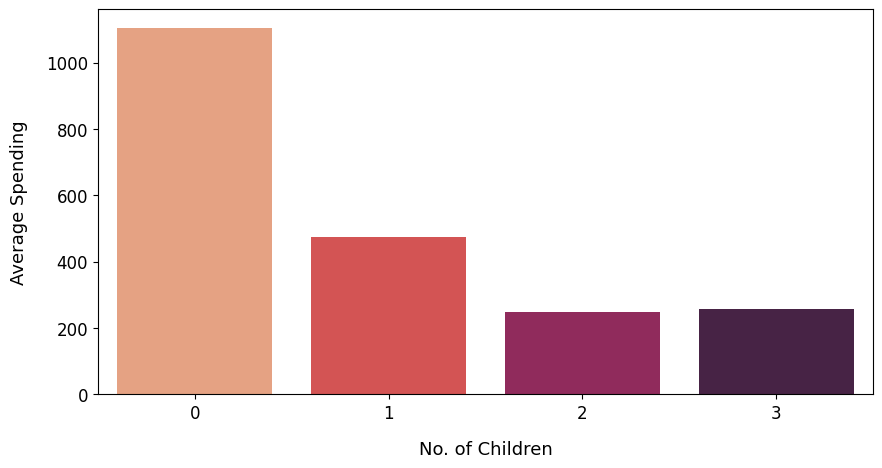

In [29]:
childrenspending = customer.groupby('Children')['TotalSpendings'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(10,5))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending", palette='rocket_r');
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('No. of Children', fontsize=13, labelpad=13)
plt.ylabel('Average Spending', fontsize=13, labelpad=13);

**INSIGHT**
- Pelanggan yang tidak memiliki anak di rumah menghabiskan lebih banyak daripada pelanggan yang memiliki 1 anak.
- Pelanggan memiliki 1 anak pengeluaran lebih tinggi daripada pelanggan memiliki 2 dan 3 anak.

### Age Distribution of Customers

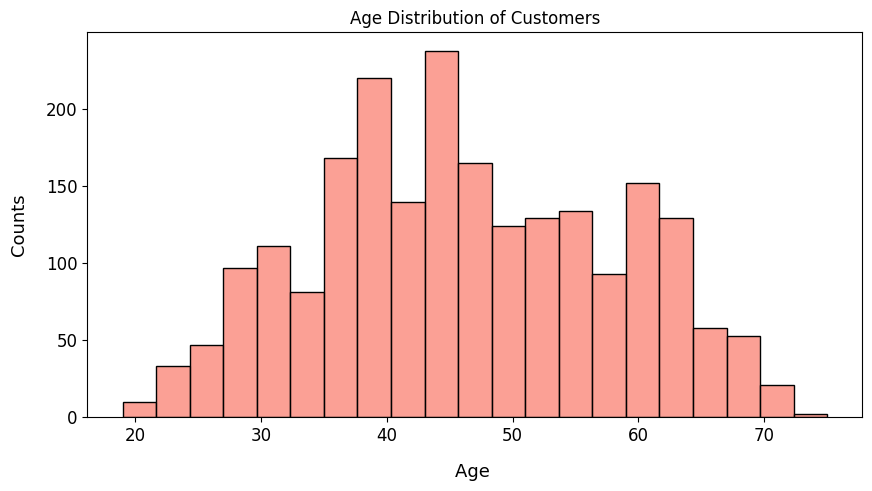

In [30]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = customer.Age, color='salmon')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Age ', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13);

**INSIGHT**

Usia pelanggan hampir terdistribusi normal, dengan sebagian besar pelanggan berusia antara 40 dan 60 tahun.

### Relationship: Age vs Spendings

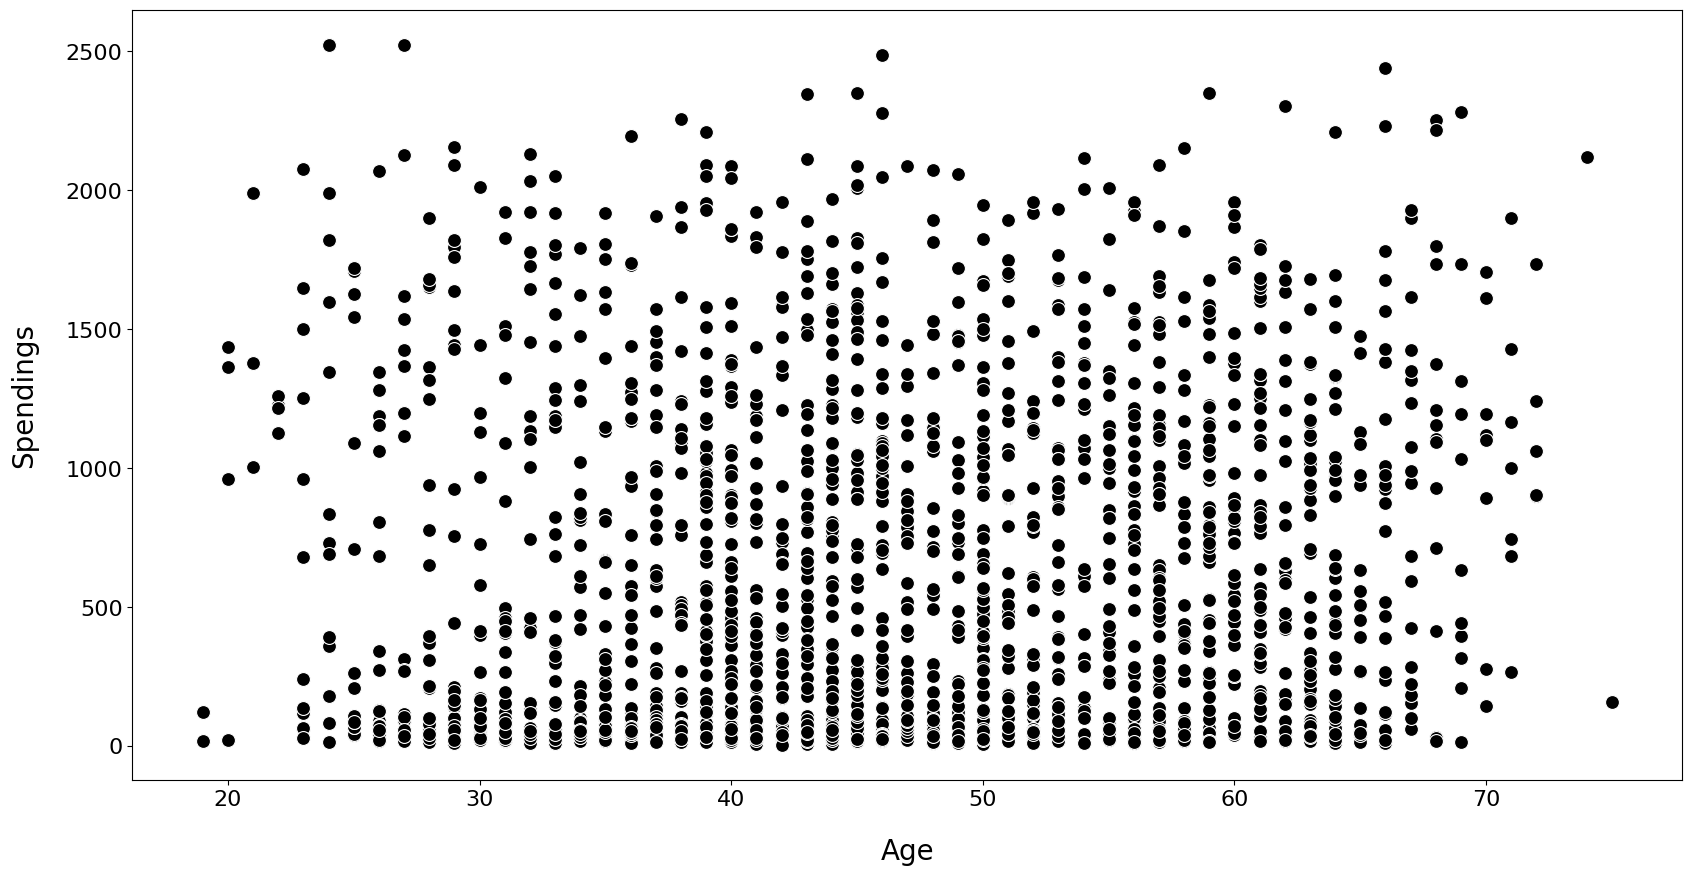

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=customer.Age, y=customer.TotalSpendings, s=100, color ='black');

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

**INSIGHT**

Tampaknya tidak ada hubungan yang jelas antara usia pelanggan dan kebiasaan belanja mereka.

### Customers Segmentation: Age Group Wise

In [27]:
agegroup = customer.AgeGroup.value_counts()

fig = px.pie(labels = agegroup.index, values = agegroup.values, names = agegroup.index, width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.4, 
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'], 
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Age Groups', 
                                      x = 0.5, y = 0.5, font_size = 20, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

**INSIGHT**
- Lebih dari 50% pelanggan adalah Dewasa Usia Pertengahan antara 40 dan 60
- Kategori usia terkenal ke-2 adalah Dewasa, berusia antara 20 dan 40

### Average Spendings: Age Group Wise

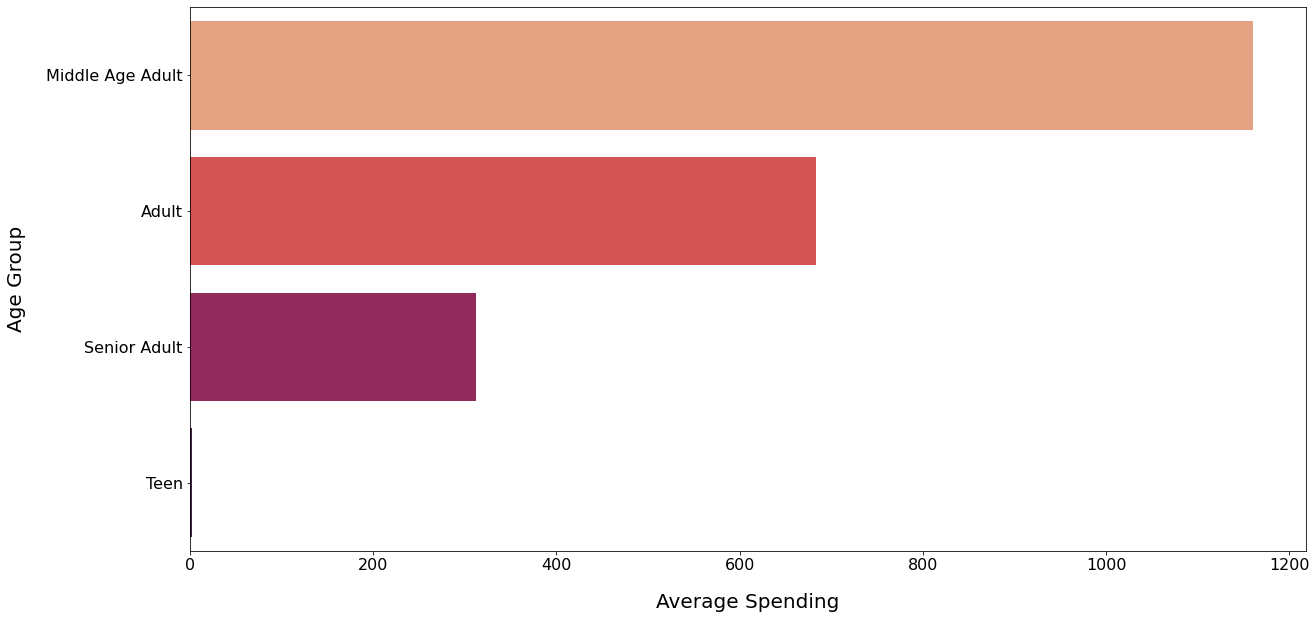

In [28]:
agegroupspending = customer.groupby('AgeGroup')['TotalSpendings'].mean().sort_values(ascending=False)
agegroupspending_df = pd.DataFrame(list(agegroup.items()), columns=['Age Group', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data = agegroupspending_df, x="Average Spending", y='Age Group', palette='rocket_r');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Age Group', fontsize=20, labelpad=20);

**INSIGHT**

Orang dewasa paruh baya menghabiskan lebih banyak daripada kelompok usia lainnya.

### Income Distribution of Customers

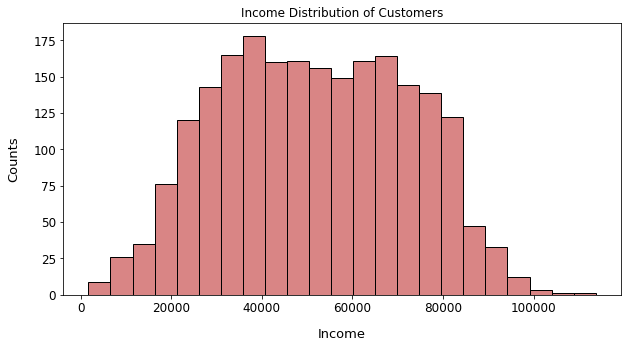

In [29]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = customer.Income, color = "indianred")
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Income', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13);

### Relationship: Income vs Spendings

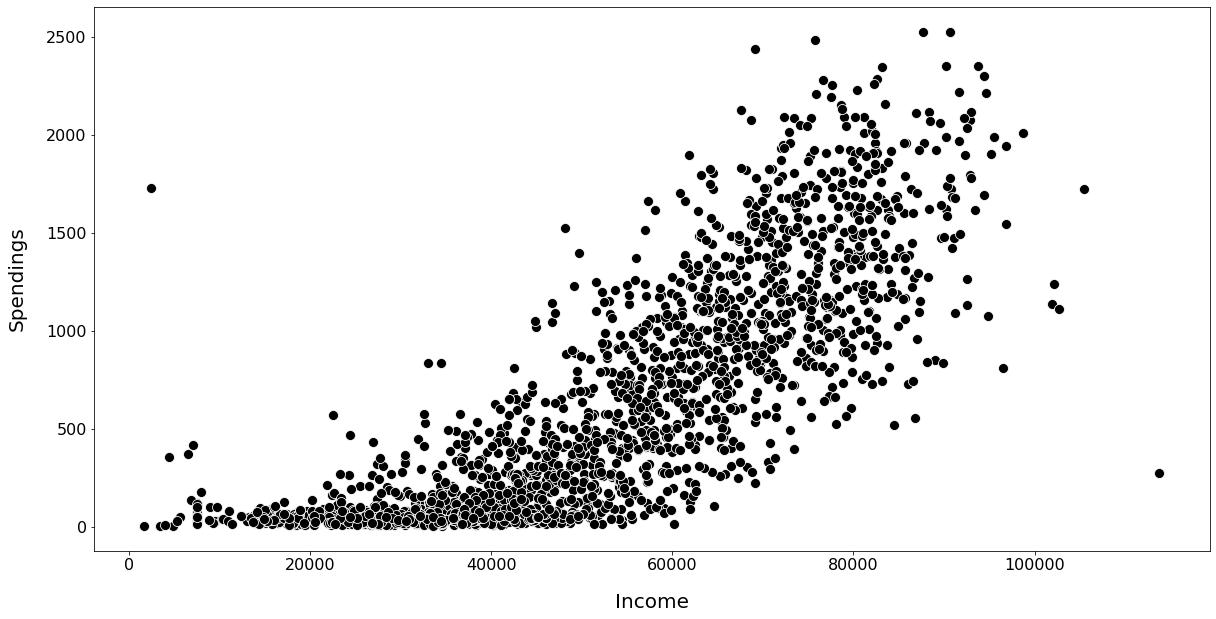

In [30]:
plt.figure(figsize=(20,10))


sns.scatterplot(x=customer.Income, y=customer.TotalSpendings, s=100, color='black')

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

**INSIGHT**

Hubungannya linier. Pelanggan yang memiliki gaji lebih tinggi membelanjakan lebih banyak

### Most Bought Products

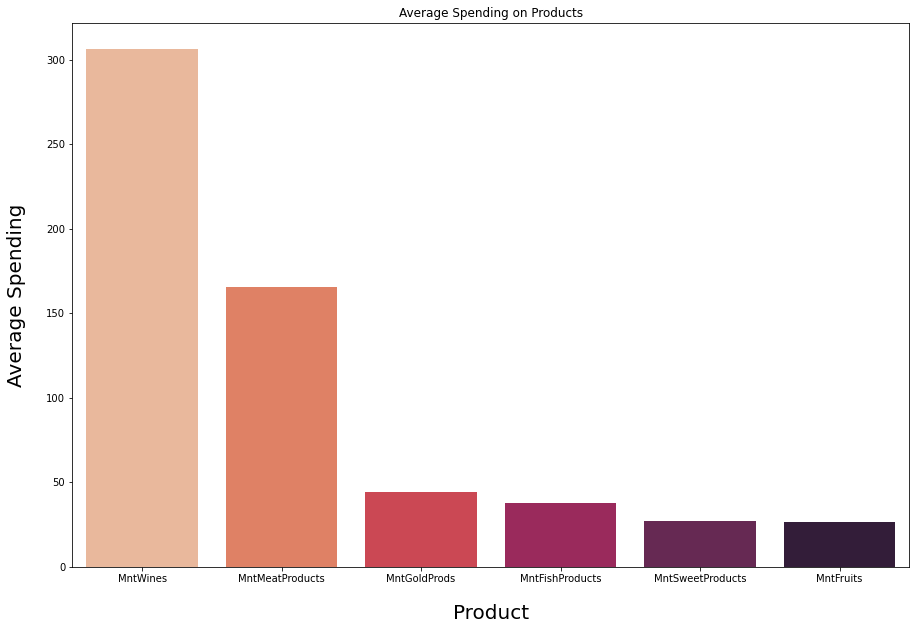

In [31]:
products = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(15,10))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df, x='Product', y='Average Spending', palette='rocket_r');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

**INSIGHT**
- Produk Anggur dan Daging adalah produk paling terkenal di antara pelanggan
- Permen dan Buah tidak sering dibeli

## Machine Learning Model

Mari kita cari tahu segmen pelanggan yang berbeda berdasarkan fitur yang berbeda dari data pelanggan menggunakan K-Means Cluster. Pertama-tama mari kita buang kolom yang tidak perlu dari data.

In [34]:
X = customer.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup'], axis=1)

In [35]:
X.columns

Index(['Income', 'Age', 'Month_Customer', 'TotalSpendings', 'Children'], dtype='object')

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2205 non-null   float64
 1   Age             2205 non-null   int64  
 2   Month_Customer  2205 non-null   float64
 3   TotalSpendings  2205 non-null   int64  
 4   Children        2205 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 167.9 KB


### Optimum Clusters Using Elbow Method

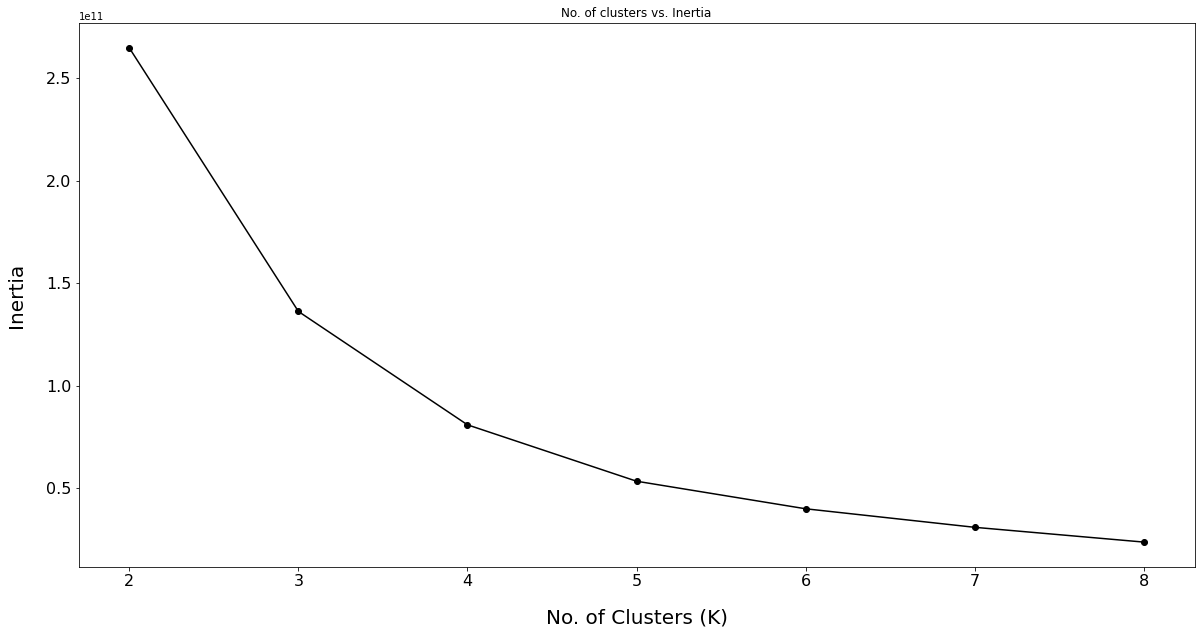

In [34]:
from sklearn.cluster import KMeans

options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o', color = 'black')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);

Berdasarkan plot di atas kami akan mengelompokkan pelanggan menjadi 4 cluster, karena nilai inersia tidak berkurang banyak setelah 4 cluster.

In [35]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

customer_kmeans = X.copy()
customer_kmeans['clusters'] = preds

### Clusters Identification

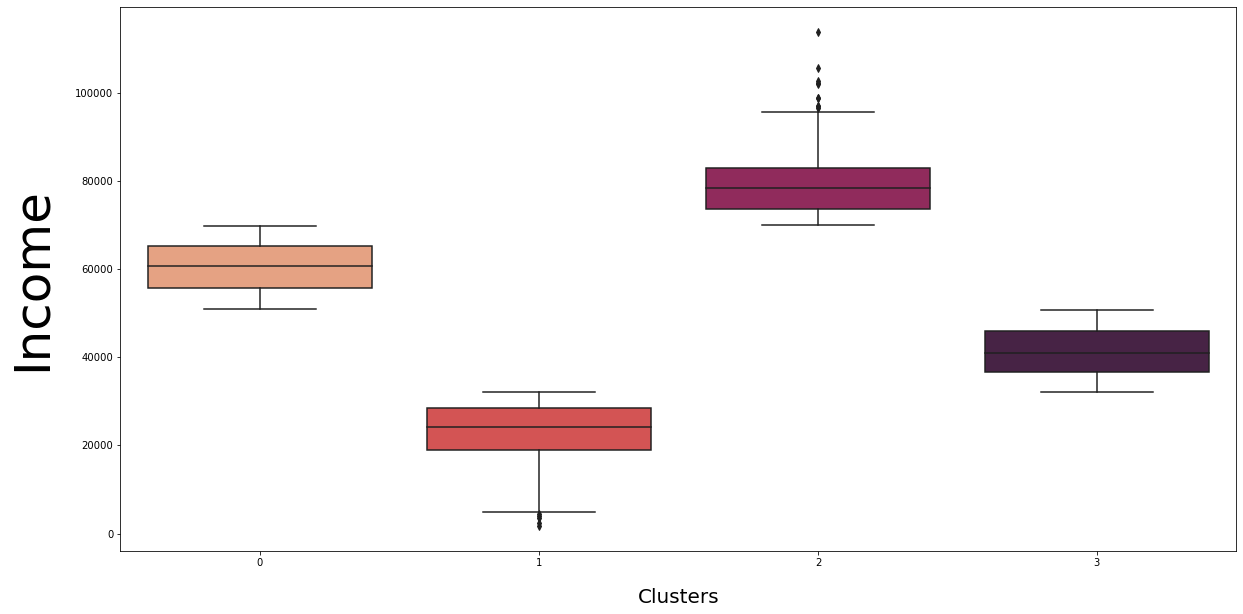

In [36]:
#Income
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=50, labelpad=20);

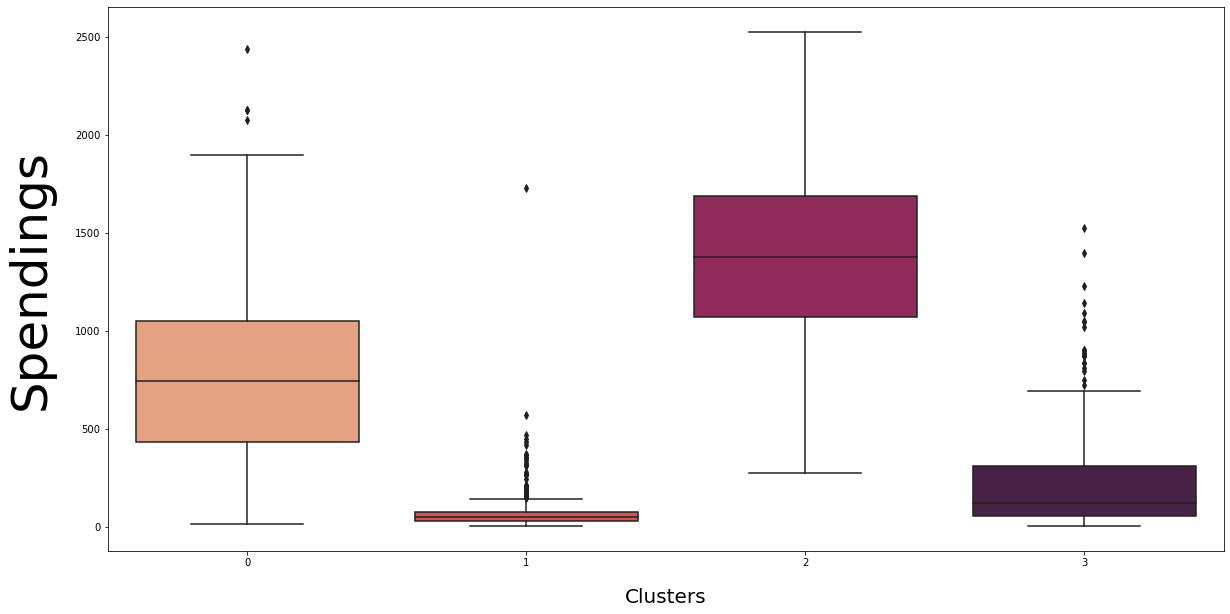

In [37]:
#Total Spending
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'TotalSpendings',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=50, labelpad=20);

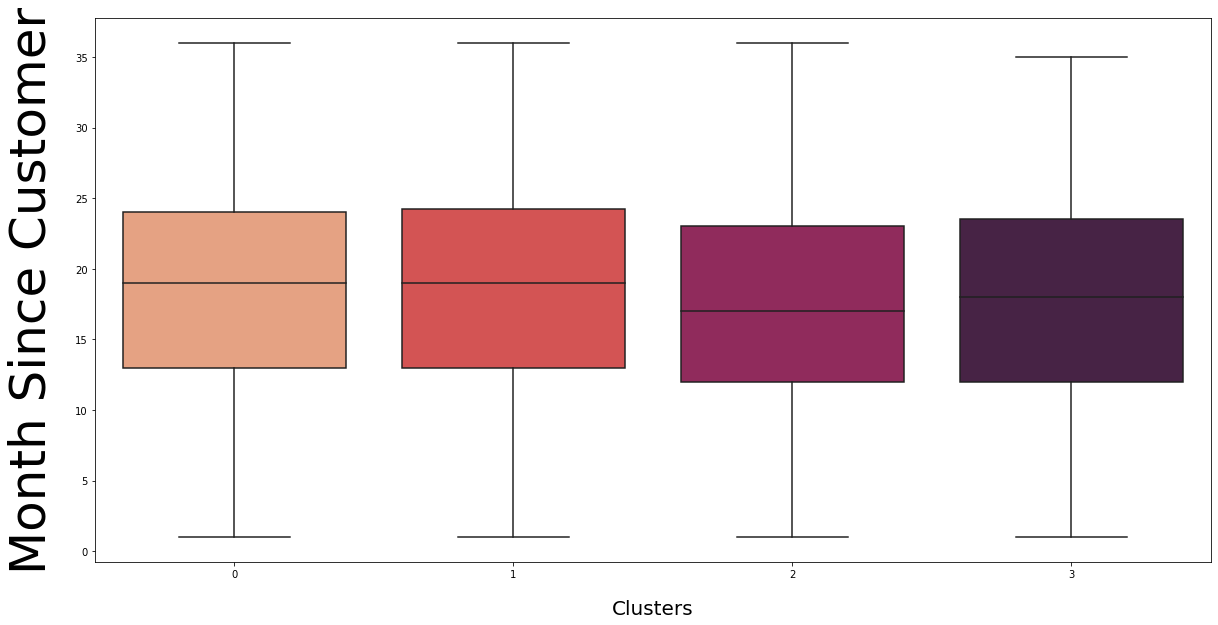

In [38]:
#Month Since Customer
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Month_Customer',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Month Since Customer', fontsize=50, labelpad=20);

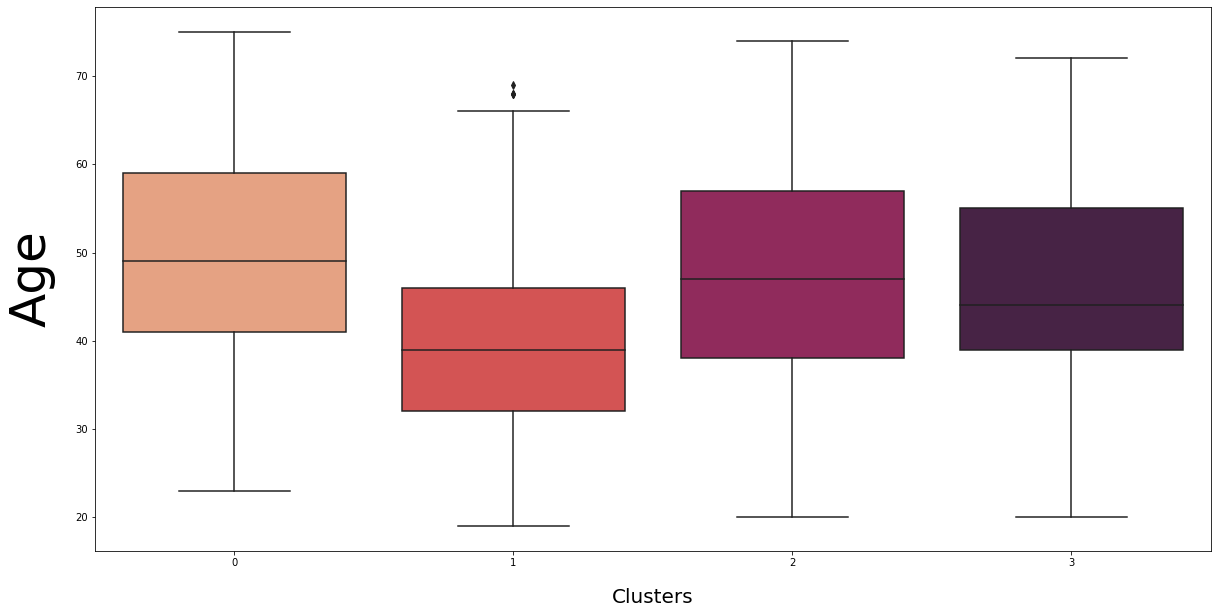

In [39]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=50, labelpad=20);

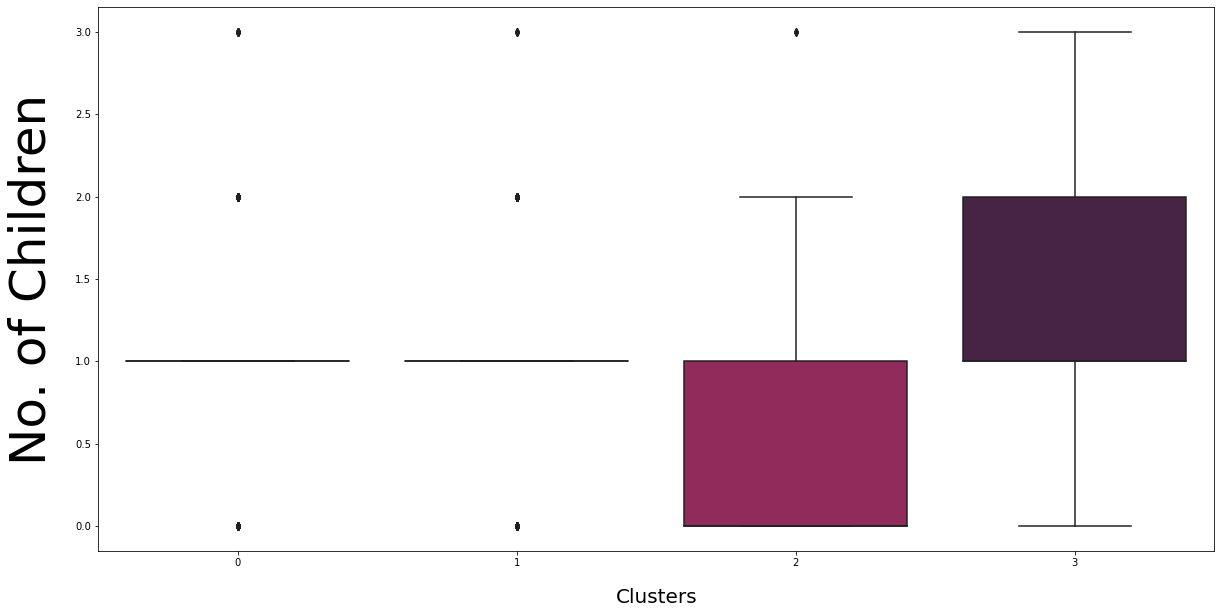

In [40]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Children',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('No. of Children', fontsize=50, labelpad=20);

Dari analisis di atas kita dapat mengelompokkan pelanggan menjadi 4 kelompok berdasarkan pendapatan dan total pengeluaran mereka:
- <b>Platinum:</b> Pendapatan tertinggi dan pengeluaran tertinggi
- <b>Gold:</b> Yang berpenghasilan tinggi dan belanja tinggi
- <b>Silver:</b> Yang memiliki gaji rendah dan pengeluaran lebih sedikit
- <b>Bronze:</b> Yang memiliki gaji terendah dan pengeluaran paling sedikit

### Data Exploration: Clusters Based

Mengidentifikasi kebiasaan belanja pelanggan dengan model cluster

In [41]:
customer_kmeans.clusters = customer_kmeans.clusters.replace({1: 'Bronze',
                                                             2: 'Platinum',
                                                             3: 'Silver',
                                                             0: 'Gold'})

customer['clusters'] = customer_kmeans.clusters

### Customers Distribution

In [42]:
cluster_counts = customer.clusters.value_counts()

fig = px.pie(cluster_counts, 
             values = cluster_counts.values, 
             names = cluster_counts.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

**INSIGHT**
- Sebagian besar pelanggan berada dalam kategori Perak dan Emas, masing-masing sekitar 29% dan 28%
- Platinum adalah kategori pelanggan terkenal ke-3 dengan 23% sementara hanya 20% yang menempati kategori perunggu

### Relationship: Income vs. Spendings

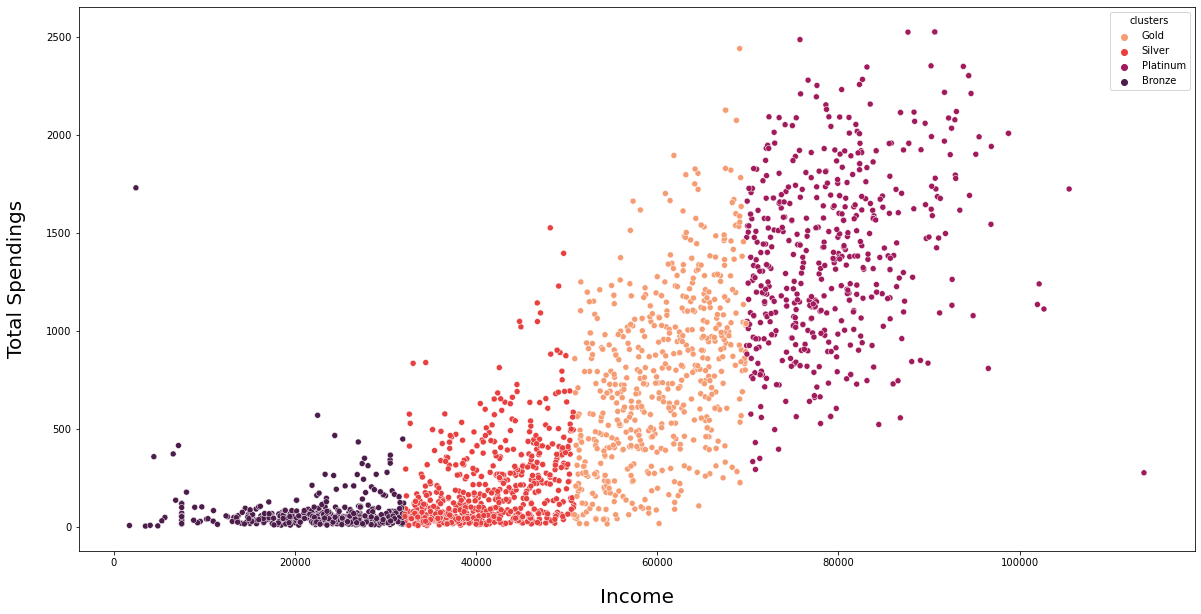

In [43]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=customer, x='Income', y='TotalSpendings', hue='clusters', palette='rocket_r');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

**INSIGHT**
- 4 cluster dapat dengan mudah diidentifikasi dari plot di atas
- Mereka yang berpenghasilan lebih banyak juga membelanjakan lebih banyak

### Spending Habits by Clusters

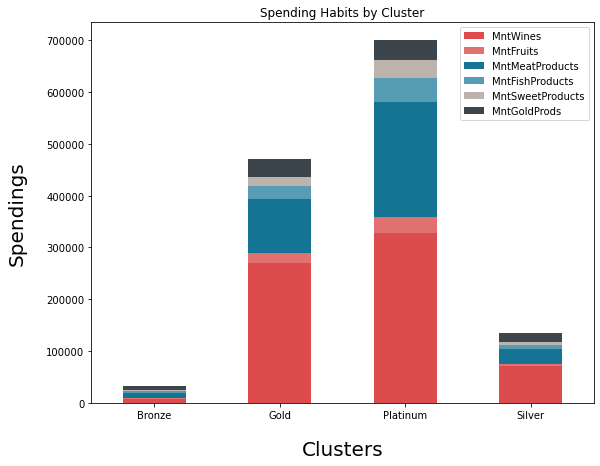

In [44]:
cluster_spendings = customer.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

cluster_spendings.plot(kind='bar', stacked=True, figsize=(9,7), color=['#dc4c4c','#e17070','#157394','#589cb4','#bcb4ac','#3c444c'])

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)
plt.xticks(rotation=0, ha='center')

**INSIGHT**

Pelanggan dari semua segmen telah menghabiskan sebagian besar uang mereka untuk produk Anggur dan Daging

### Purchasing Habits by Clusters

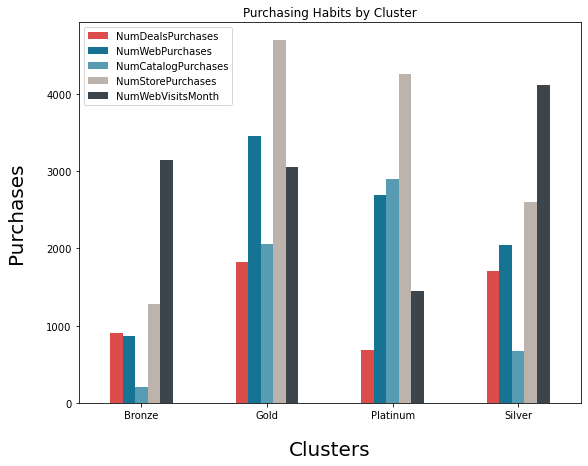

In [45]:
cluster_purchases = customer.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

cluster_purchases.plot(kind='bar', color=['#dc4c4c','#157394','#589cb4','#bcb4ac','#3c444c'], figsize=(9,7))

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

**INSIGHT**
- Pelanggan Platinum dan Emas sebagian besar cenderung melakukan pembelian di toko
- Sebagian besar pembelian web dan katalog juga dilakukan oleh pelanggan dari segmen Platinum dan Gold
- Kategori Perak dan Emas juga suka membeli dari toko
- Pembelian deal adalah hal biasa di antara pelanggan Gold dan Silver
- Pelanggan kategori Silver melakukan kunjungan web paling banyak sementara pelanggan dari segmen Platinum memiliki kunjungan web paling sedikit

### Promotions Acceptance by Clusters

<Figure size 2160x1080 with 0 Axes>

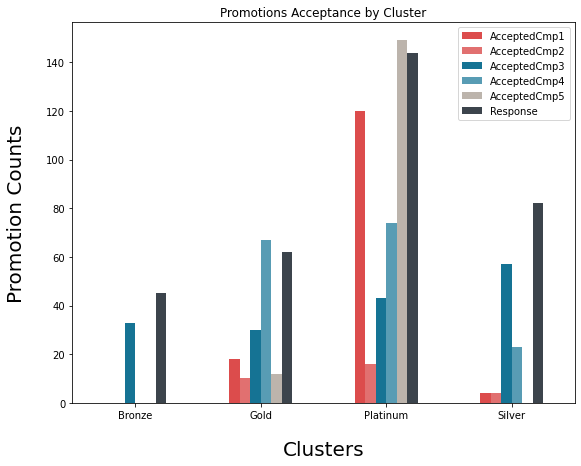

In [46]:
cluster_campaign = customer.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(30,15))
cluster_campaign.plot(kind='bar', color=['#dc4c4c','#e17070','#157394','#589cb4','#bcb4ac','#3c444c'],figsize=(9,7))

plt.title('Promotions Acceptance by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

**INSIGHT**
- Pelanggan Platinum menerima sebagian besar penawaran dari perusahaan
- Kampanye 1, 5 dan yang terakhir sepertinya yang paling sukses
- Kategori perunggu menunjukkan minat paling rendah dalam kampanye promosi perusahaan

## Conclussion

- Sebagian besar pelanggan adalah lulusan universitas
- Sebagian besar pelanggan tinggal bersama mitra
- Mereka yang hidup sendiri telah menghabiskan lebih banyak daripada mereka yang tinggal bersama pasangan
- Sebagian besar pelanggan hanya memiliki satu anak
- Mereka yang tidak memiliki anak telah menghabiskan lebih banyak
- Dewasa Usia Pertengahan, berusia antara 40 dan 60 tahun, adalah kategori kelompok usia yang terkenal
- Orang dewasa paruh baya menghabiskan rata-rata, lebih dari kelompok usia lainnya
- Sebagian besar pelanggan berpenghasilan antara 25000 dan 85000
- Produk Anggur dan Daging sangat terkenal di kalangan pelanggan
- Berdasarkan pendapatan dan total pengeluaran, pelanggan dibagi menjadi 4 klaster yaitu Platinum, Gold, Silver dan Bronze
- Sebagian besar pelanggan termasuk dalam kategori Perak dan Emas
- Mereka yang berpenghasilan lebih banyak juga membelanjakan lebih banyak
- Sebagian besar pelanggan suka membeli dari toko dan kemudian online dari web
- Pelanggan Platinum menunjukkan lebih banyak penerimaan terhadap kampanye promosi sementara pelanggan perunggu paling sedikit tertarik

## Business Answer

**Apa karakteristik statistik pelanggan?**
<br>Pelanggan perusahaan sebagian besar sudah menikah. Ada lebih banyak orang dewasa paruh baya, berusia antara 40 dan 60 dan kebanyakan dari mereka ingin memiliki satu anak. Sebagian besar pelanggan memegang gelar sarjana dan penghasilan mereka sebagian besar antara 25.000 dan 85.000.

**Apa kebiasaan belanja pelanggan?**
<br>Pelanggan telah menghabiskan lebih banyak untuk anggur dan produk daging. Mereka yang tidak memiliki anak telah menghabiskan lebih banyak daripada mereka yang memiliki anak. Single menghabiskan lebih dari satu dengan pasangan. Orang dewasa paruh baya telah menghabiskan lebih banyak daripada kelompok usia lainnya. Belanja di toko adalah saluran pilihan untuk membeli di antara pelanggan. Pembelian Web dan Katalog juga memiliki potensi.

**Apakah ada beberapa produk yang membutuhkan lebih banyak pemasaran?**
<br>Produk Manis dan Buah membutuhkan pemasaran yang efektif. Perusahaan perlu melakukan promosi untuk produk-produk tersebut guna meningkatkan pendapatan dari produk-produk tersebut. Keranjang produk dengan penjualan paling sedikit dikombinasikan dengan produk yang paling laris bisa efektif.

**Bagaimana pemasaran dapat dibuat efektif?**
<br>Sebagai rekomendasi pemasaran, berikan kupon kepada pelanggan lama dan pembelanjaan tinggi. Memasarkan produk murah dan produk yang ditawarkan kepada pelanggan berpenghasilan rendah dan belanja rendah. Pembelian web memiliki beberapa potensi. Untuk membuka kunci ini, berikan diskon khusus kepada pelanggan yang mendaftar di situs web perusahaan.